# Data Analysis on video games' sales trend

In this notebook, we have tried to find the trends of the video game sales across regions and globally. We have also tried to look at which genre is loved the most and which platform is being used the most for playing the video games.

We have imported some of the widely used Python libraries which are 

- NumPy : NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.
- Pandas : Pandas is an open source Python package that is most widely used for data science/data analysis and machine learning tasks. It is built on top of another package named Numpy, which provides support for multi-dimensional arrays
- MatPlotlib : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.
- Seaborn : Seaborn is an open-source Python library built on top of matplotlib. It is used for data visualization and exploratory data analysis. Seaborn works easily with dataframes and the Pandas library. The graphs created can also be customized easily.

In [1]:
# importing all the required libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Downloading the Dataset

In order to process the data and analyze it, we need to download the data into python to be read and analyse and jump to the conclusions based on the analysis. A data could be received either in the form of a CSV file or from a URL. In our analysis we have used pd.read to read the CSV file and store the contents of the file in a variable which basically we will be using for further analysis.

In [2]:
# reading the data, storing the contents in a variable
df = pd.read_csv('vgsales.csv')

In [3]:
# Seeing what our data looks like and how huge is our data

df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# Data Preparation and Cleaning

Lets start prepping up our data and clean it for the purposes of our analysis. In this section, what we are going to do is set the Rank column as the index, change the datatypes of any column required and handle the missing values by either dropping the rows or the columns or inserting those missing values as Zero.

In [4]:
# Making the rank the index 

df1 = df.set_index('Rank',inplace=True)

In [5]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [6]:
# Seeing how many missing values we have

df.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
# Checking the data types of all the columns
df.dtypes

Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [8]:
# Dropping the missing Values filtering by the column Year
df = df.dropna(subset=['Year'])

In [9]:
# Lets Verify
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [10]:
# Changing the year data type from float to int

df = df.astype({"Year":'int'})

In [11]:
# Now lets check if the Year data type was converted to integer or not. YES, it was!! 
df.dtypes

Name             object
Platform         object
Year              int32
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

# Exploratory Analysis and Visualization

In this section we would try to explore the basic mean, sum and the ranges of our data. We are going to take a look at the distribution of numeric columns, try to find out the relationship between the columns in our data using scatter plots, bar plots etc and point any interesting facts about our data

In [12]:
# Lets have a quick look at the ranges in our data

df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000
mean,2006.406443,0.265415,0.147554,0.078661,0.048325,0.540232
std,5.828981,0.821591,0.508766,0.311557,0.189885,1.565732
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


As you can see that our Year mean is 2006, the maximum year is 2020 and the minimum is 1980 which means our data ranges from 1980 to 2020. The max of global sales is 82.74 and the major sales is contributed to the global sales by the North America followed by the sales in Europe.

In [14]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [68]:
df.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [22]:
df.Publisher.nunique()
print('There are {} different publishers in our data.'.format(df.Publisher.nunique()))
df.Genre.nunique()
print('There are {} different genre in our data.'.format(df.Genre.nunique()))

There are 576 different publishers in our data.
There are 12 different genre in our data.


In [79]:
most_sales = df.sort_values('Global_Sales',ascending = False).head(10)
most_sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


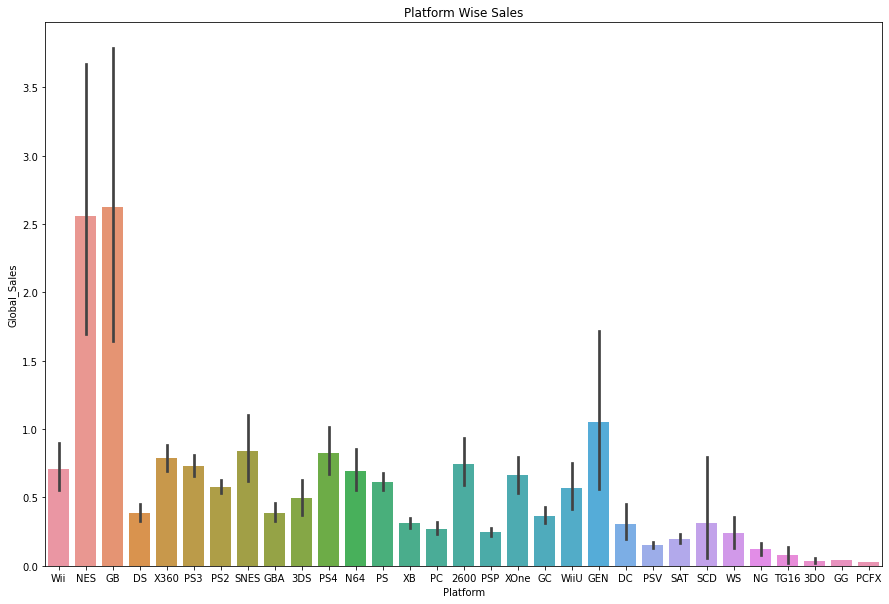

In [187]:
plt.figure(figsize=(15,10))
sns.barplot(x=df.Platform, y=df.Global_Sales)
plt.title("Platform Wise Sales")
plt.xlabel('Platform');

In the above chart you can see the top platforms used for playing video games. We have tried to look at the platform wise sales and which platform is widely used. GB ranks #1 while the NES is at #2 followed by GEN at #3.

In [82]:
Top_Publishers = df.sort_values('Rank',ascending = True).head(10)
Top_Publishers

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


In [148]:
JP_Sales = df.groupby('Year')['JP_Sales'].sum()
JP_Sales

Year
1980     0.00
1981     0.00
1982     0.00
1983     8.10
1984    14.27
1985    14.56
1986    19.81
1987    11.63
1988    15.76
1989    18.36
1990    14.88
1991    14.78
1992    28.91
1993    25.33
1994    33.99
1995    45.75
1996    57.44
1997    48.87
1998    50.04
1999    52.34
2000    42.77
2001    39.86
2002    41.76
2003    34.20
2004    41.65
2005    54.28
2006    73.73
2007    60.29
2008    60.26
2009    61.89
2010    59.49
2011    53.04
2012    51.74
2013    47.59
2014    39.46
2015    33.72
2016    13.70
2017     0.05
2020     0.00
Name: JP_Sales, dtype: float64

In [149]:
NA_Sales = df.groupby('Year')['NA_Sales'].sum()
NA_Sales

Year
1980     10.59
1981     33.40
1982     26.92
1983      7.76
1984     33.28
1985     33.73
1986     12.50
1987      8.46
1988     23.87
1989     45.15
1990     25.46
1991     12.76
1992     33.87
1993     15.12
1994     28.15
1995     24.82
1996     86.76
1997     94.75
1998    128.36
1999    126.06
2000     94.49
2001    173.98
2002    216.19
2003    193.59
2004    222.59
2005    242.61
2006    263.12
2007    312.05
2008    351.44
2009    338.85
2010    304.24
2011    241.06
2012    154.96
2013    154.77
2014    131.97
2015    102.82
2016     22.66
2017      0.00
2020      0.27
Name: NA_Sales, dtype: float64

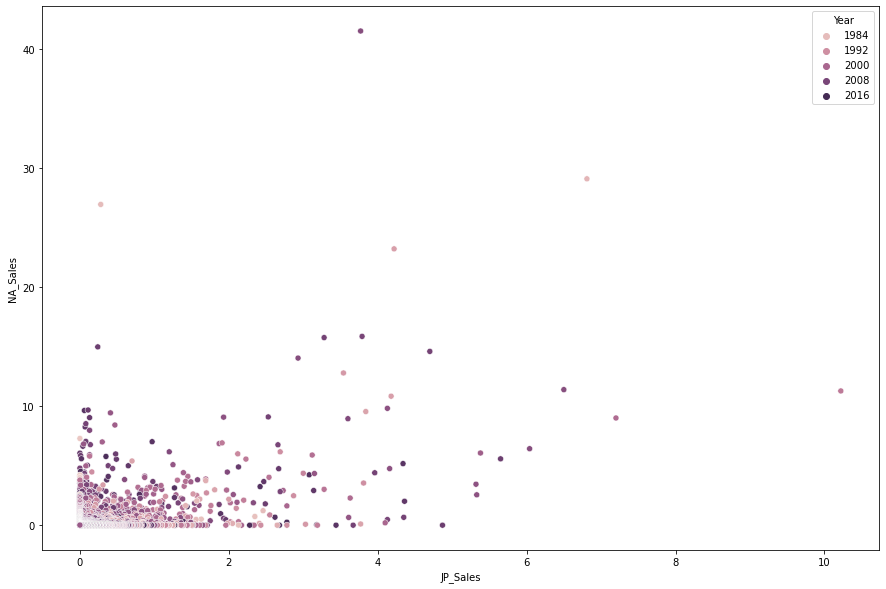

In [186]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df.JP_Sales, y=df.NA_Sales, hue = df.Year);

From the above scatter plots, what we can derive is the sales in Japan and North America are mostly spreaded towards the lower and mid spectrum however there are few data points that tell us in some years, sales have drastically gone up for North America in 2008 and for Japan it's in 2006.

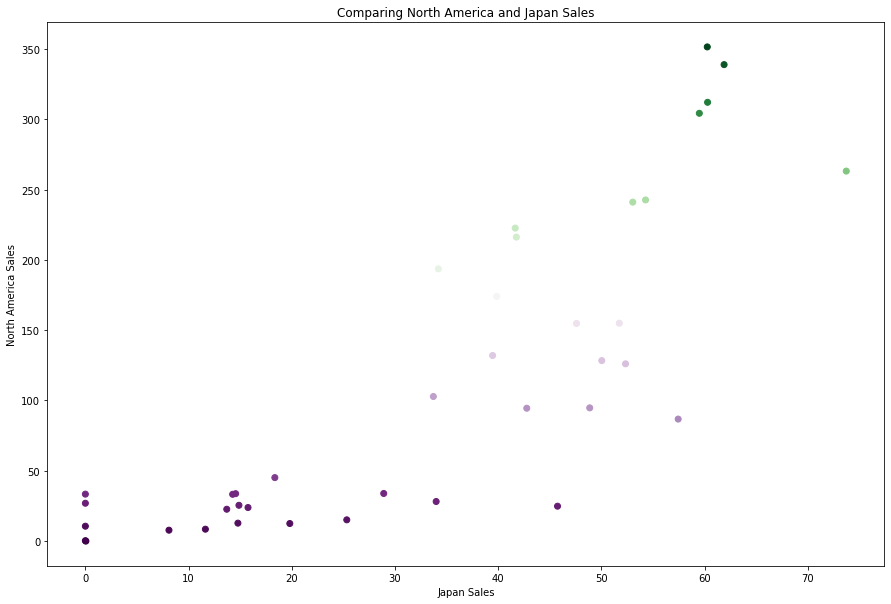

In [185]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.xlabel('Japan Sales')
plt.ylabel('North America Sales')
plt.title('Comparing North America and Japan Sales')
ax.scatter(JP_Sales, NA_Sales,c=NA_Sales,cmap = 'PRGn')
plt.show()

The above scatterplot gives us much clearer picture of the Japan and North America sales. We can see since there are more data points on the higher spectrum of Japan sales as compared to the North America which means Video games are highly popular in Japan as opposed to North America.

# Asking and Answering Questions

In this section, we would ask some questions about the data and then try to answer those questions.

### Q1. Identify the sales trend among various regions and globally as well.

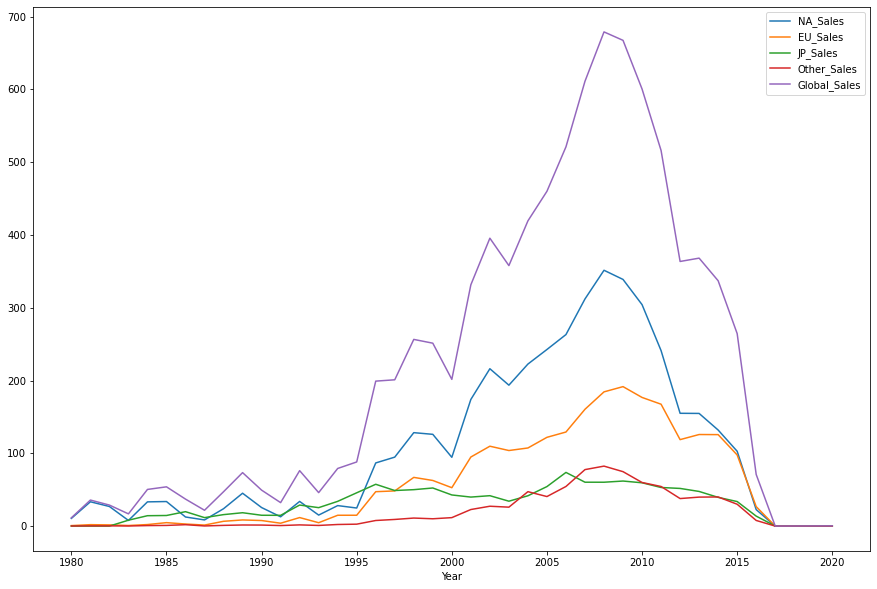

In [169]:
Year_Sales = df.groupby('Year').sum()
Year_Sales
Year_Sales.plot.line(figsize=(15, 10));

From the line chart above, we can see there has been a spike in video games sales across all the regions between 2005 and 2010. However if you look closely there was a spike in a Japan in 1996 as well. Looking at the broader picture, the North America sales have been the biggest contributor followed by the Japan in the Global Sales count from 2005 to 2010.

### Q2. What were the top 10 games that had the most sales worldwide?

In [163]:
most_sales = df.sort_values('Global_Sales',ascending = False).head(10)
most_sales.Name

Rank
1                    Wii Sports
2             Super Mario Bros.
3                Mario Kart Wii
4             Wii Sports Resort
5      Pokemon Red/Pokemon Blue
6                        Tetris
7         New Super Mario Bros.
8                      Wii Play
9     New Super Mario Bros. Wii
10                    Duck Hunt
Name: Name, dtype: object

In the above question, we have tried to look at some of the most sold video games globally. We have first of sorted the data using the Global Sales column, put them in descending order and then selected only the top 10 values to retrieve the names of the most sold video games worldwide.

### Q3. Which genre was widely accepted across regions?

In [171]:
Highest_Selling_genre = df.groupby('Genre').sum()
Highest_Selling_genre.drop(['Year'], axis = 1).sort_values('Global_Sales',ascending=False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,861.80,516.48,158.66,184.92,1722.88
Sports,670.09,371.34,134.76,132.65,1309.24
Shooter,575.16,310.45,38.18,101.90,1026.20
Role-Playing,326.50,187.58,350.29,59.38,923.84
Platform,445.99,200.67,130.65,51.51,829.15
Misc,402.48,213.82,106.67,74.02,797.62
Racing,356.93,236.32,56.61,76.68,726.77
Fighting,220.74,100.00,87.15,36.19,444.05
Simulation,181.78,113.20,63.54,31.36,390.16


In the above question, we have tried to look at some of the most loved video games genre. We have used the groupby method to group the data basis the genre and then sorted values based on Global Sales and in descending order. We can see that the top 3 genre people love are Action followed by the Sports and Shooter genre.

### Q4. Which were the top 10 publishers across all regions?

In [184]:
Highest_Selling_Publisher = df.groupby('Publisher').sum()
Highest_Selling_Publisher.drop(['Year'], axis = 1).sort_values('Global_Sales',ascending=False).head(10)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Nintendo,815.75,418.30,454.99,95.19,1784.43
Electronic Arts,584.22,367.38,13.98,127.63,1093.39
Activision,426.01,213.72,6.54,74.79,721.41
Sony Computer Entertainment,265.22,187.55,74.10,80.40,607.28
Ubisoft,252.81,163.03,7.33,50.16,473.54
Take-Two Interactive,220.47,117.95,5.83,55.20,399.30
THQ,208.60,94.60,5.01,32.11,340.44
Konami Digital Entertainment,88.91,68.62,90.93,29.91,278.56
Sega,108.78,81.41,56.19,24.30,270.70


The top 10 publishers are listed in the dataframe above where in we can clearly see that Nintendo is the biggest publisher worldwide and its major contributors are the North American and the Japanese market. Electronic Arts is the top second publisher where North American and Japanese market again are the top contributors to the total global sales. We have used the similar approach as we did in the previous question to create the dataframe.


# Inferences and Conclusion

From our analysis above, what we can say is

- The sales of video games was at peak between 2005 and 2010 however it came down drastically and here is an article posted by NY times talking about what are the probable reasons for the same https://www.nytimes.com/2012/10/07/arts/video-games/video-game-retail-sales-decline-despite-new-hits.html
- Action genre is mostly loved globally followed by Sports and Shooter genre.
- Nintendo, Activision and Electronic Arts games were sold the most across the globe however Japan and other countries sales of Activision was lesser than Sony Computer Entertainment.
- Wii Sports, Super Mario Bros and Mario Kart Wii turn out to be the top most sold games worldwide.

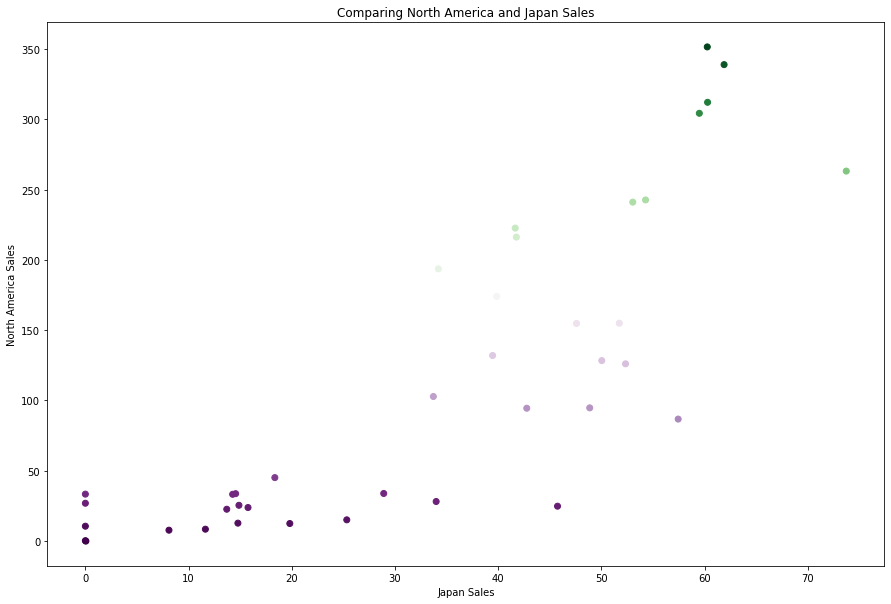

In [192]:
from PIL import Image
img1 = Image.open("Scatter Plot.png");
img1

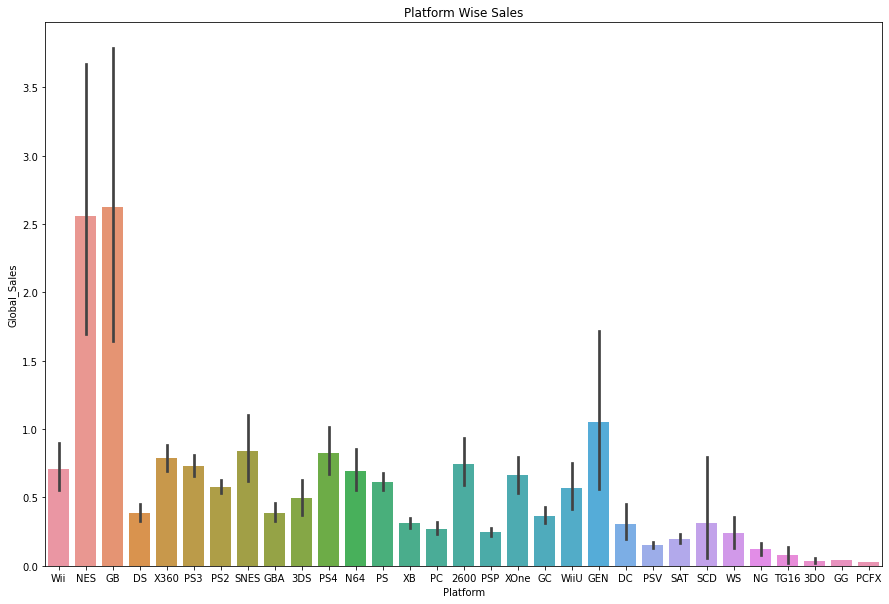

In [193]:
from PIL import Image
img2 = Image.open("Bar Plot.png");
img2

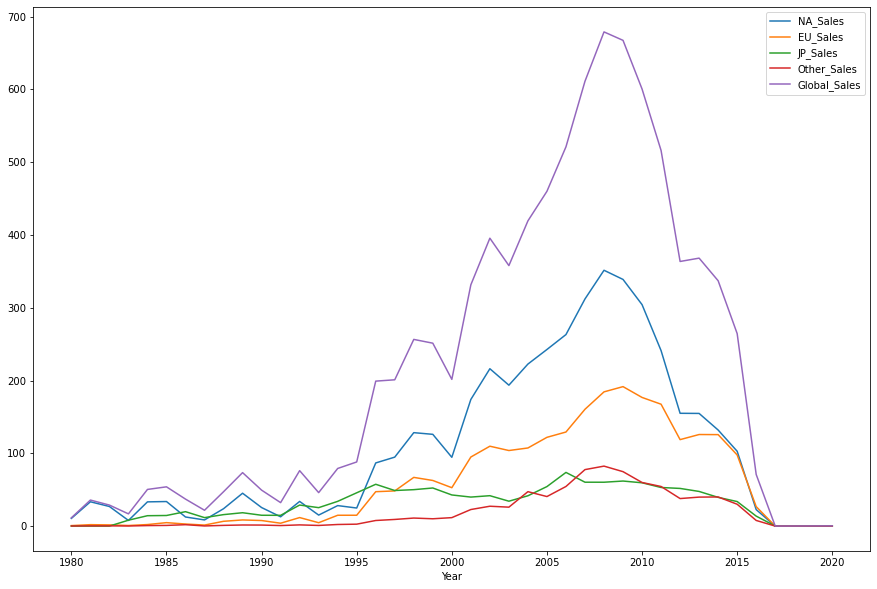

In [194]:
from PIL import Image
img3 = Image.open("Line Chart.png");
img3

Helpful Links 
- https://www.kaggle.com/gregorut/videogamesales
- https://matplotlib.org/stable/tutorials/introductory/pyplot.html
- https://pandas.pydata.org/docs/ 
- https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas

Going forward, one should look for datasets that highlight the current scenario of the video games in last 2-5 years and if there has been any surge or plummeting of the video game sales globally and continent wise and also point the reasons as to why there was a dip or spike in the video game sales.